In [1]:
import pandas as pd
from fbprophet import Prophet

In [2]:
df = pd.read_csv('./data/british airways.csv')

In [20]:
df.head()

,ds,y
0,2005-07-01,21686
1,2005-08-01,20084
2,2005-09-01,20635
3,2005-10-01,18988
4,2005-11-01,15554


In [13]:
df.rename(columns={'Date': 'ds', 'Adjusted Passenger Count': 'y'}, inplace=True)

In [14]:
df.head()

,ds,y
0,2005-07-01,21686
1,2005-08-01,20084
2,2005-09-01,20635
3,2005-10-01,18988
4,2005-11-01,15554


In [21]:
train = df.shape[0] * 0.8

In [52]:
m = Prophet()

m.fit(df.loc[:train, :])  # I'm not sure what I need to do here: df or df.loc[:train, :]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [53]:
forecast = m.predict(df.loc[train:, :])

In [56]:
import matplotlib.pyplot as plt
#import matplotlib.dates as mdates
from pandas import to_datetime

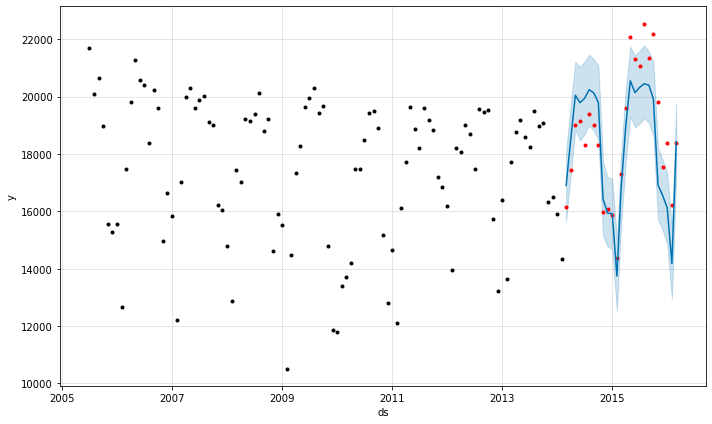

In [69]:
fig1 = m.plot(forecast)
ax = fig1.axes[0]
# print(ax.axis())
plt.scatter(to_datetime(df.loc[train:, 'ds']), df.loc[train:, 'y'], color='r', s=9);

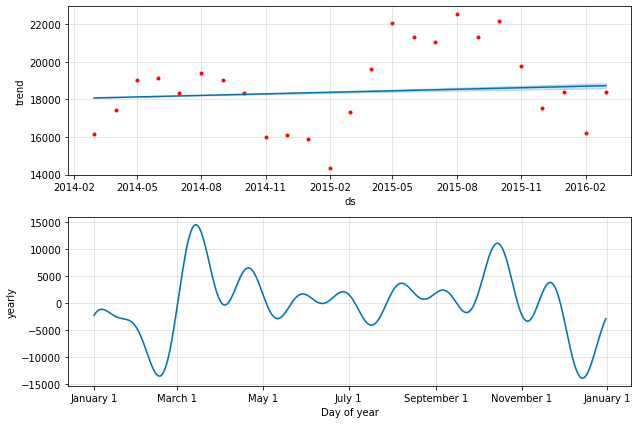

In [98]:
fig2 = m.plot_components(forecast)
#fig3 = plt.figure()
#plt.plot(to_datetime(df.loc[:train, 'ds']), df.loc[:train, 'y'])
# plt.
fig2.axes[0].scatter(to_datetime(df.loc[train:, 'ds']), df.loc[train:, 'y'], color='r', s=9);

In [99]:
forecast_on_all = m.predict(df)

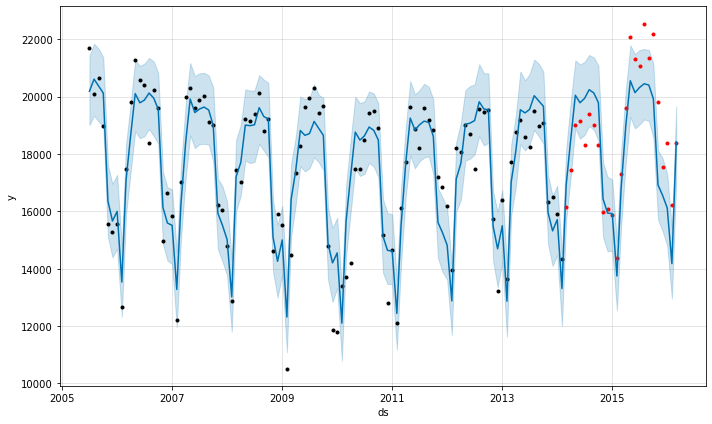

In [102]:
fig3 = m.plot(forecast_on_all)
ax = fig1.axes[0]
# print(ax.axis())
plt.scatter(to_datetime(df.loc[train:, 'ds']), df.loc[train:, 'y'], color='r', s=9);

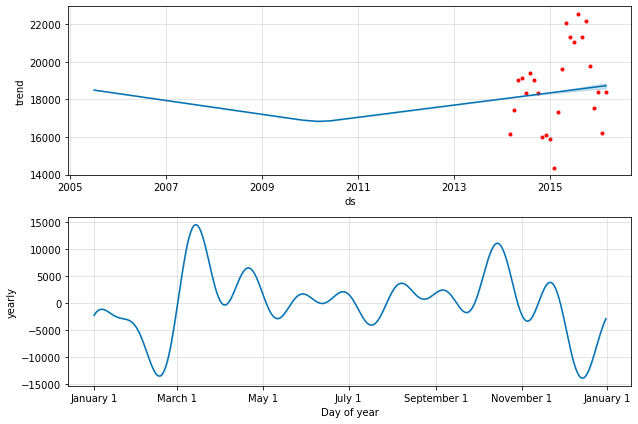

In [103]:
fig4 = m.plot_components(forecast_on_all)
#fig3 = plt.figure()
#plt.plot(to_datetime(df.loc[:train, 'ds']), df.loc[:train, 'y'])
# plt.
fig4.axes[0].scatter(to_datetime(df.loc[train:, 'ds']), df.loc[train:, 'y'], color='r', s=9);